In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [3]:
train = pd.read_csv("../input/cat-in-the-dat-ii/train.csv", index_col="id")
train = train.convert_dtypes()

In [4]:
ord_5 = train[["ord_3", "ord_4", "ord_5", "target"]].dropna().copy()
ord_5["first"] = ord_5["ord_5"].str[0]
ord_5["first_low"] = ord_5["first"].str.lower()
ord_5["second"] = ord_5["ord_5"].str[1]
ord_5["second_low"] = ord_5["second"].str.lower()
ord_5

,ord_3,ord_4,ord_5,target,first,first_low,second,second_low
id,,,,,,,,
0,c,U,Pw,0,P,p,w,w
1,e,X,pE,0,p,p,E,e
2,n,P,eN,0,e,e,N,n
4,h,C,OZ,0,O,o,Z,z
5,b,Q,wa,0,w,w,a,a
...,...,...,...,...,...,...,...,...
599995,a,R,GZ,0,G,g,Z,z
599996,n,N,sf,0,s,s,f,f
599997,n,H,MV,0,M,m,V,v


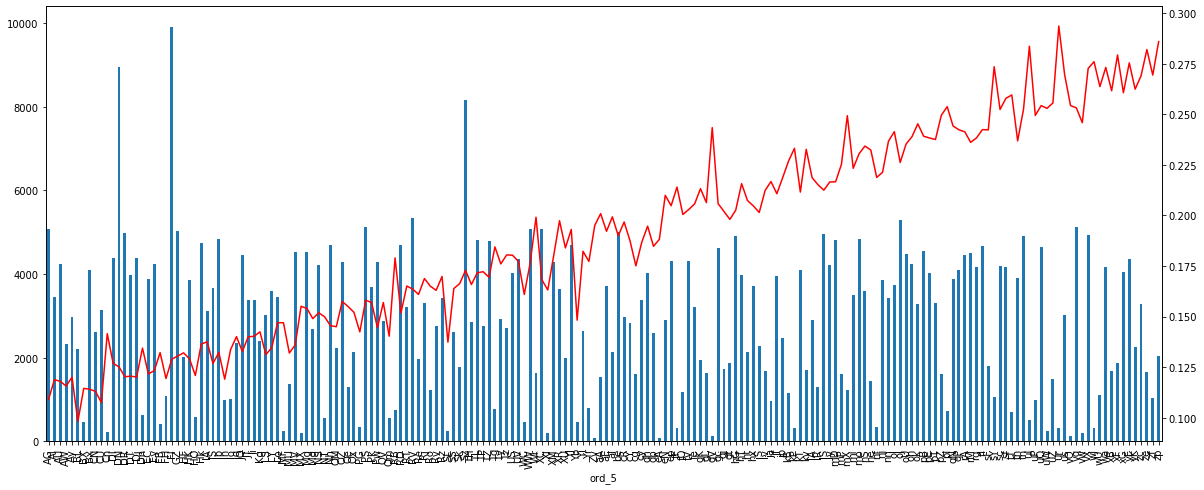

In [5]:
col = "ord_5"
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
ord_5.groupby(col)["target"].count().plot.bar(ax=ax1)
ord_5.groupby(col)["target"].mean().plot(ax=ax2, color="red")

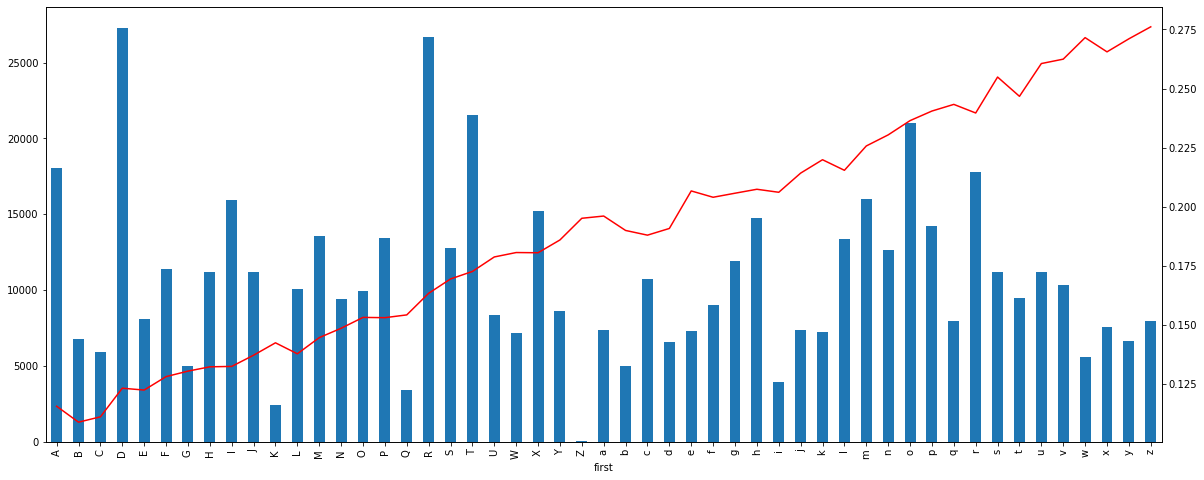

In [6]:
col = "first"
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
ord_5.groupby(col)["target"].count().plot.bar(ax=ax1)
ord_5.groupby(col)["target"].mean().plot(ax=ax2, color="red")

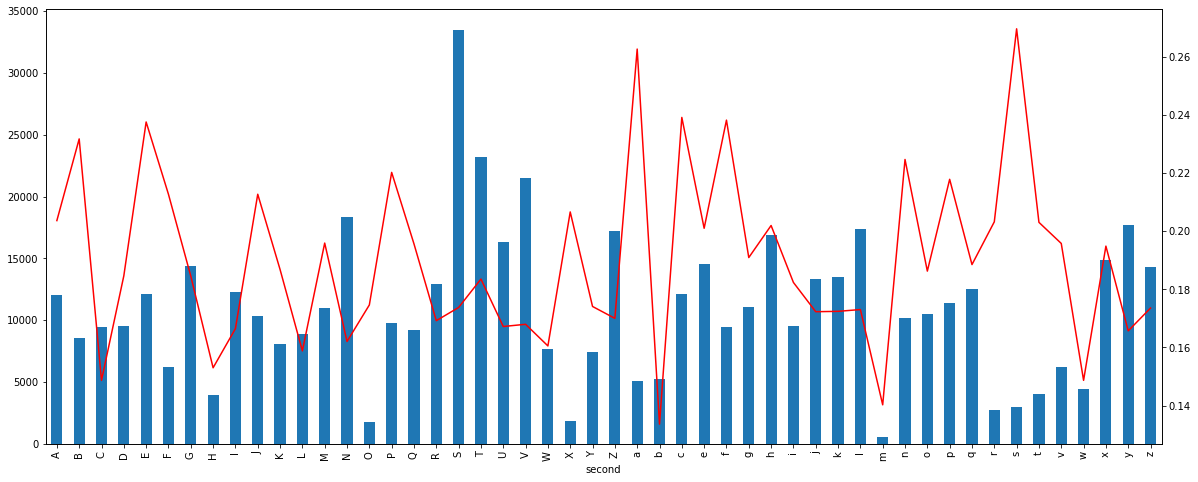

In [7]:
col = "second"
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
ord_5.groupby(col)["target"].count().plot.bar(ax=ax1)
ord_5.groupby(col)["target"].mean().plot(ax=ax2, color="red")

In [8]:
import category_encoders as ce

In [16]:
ord_5 = train[["ord_3", "ord_4", "ord_5", "target"]].copy()
ord_5['second'] = ord_5['ord_5'].str[1]

In [19]:
encoder = ce.OneHotEncoder(cols=['second'], use_cat_names=True)
encoder.fit(ord_5['second'])

OneHotEncoder(cols=['second'], drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [21]:
encoder.transform(ord_5['second'])

,second_w,second_E,second_N,second_<NA>,second_Z,second_a,second_g,second_S,second_X,second_G,second_F,second_V,second_h,second_p,second_M,second_v,second_K,second_b,second_W,second_i,second_f,second_z,second_k,second_l,second_o,second_D,second_I,second_J,second_q,second_s,second_Y,second_y,second_U,second_j,second_H,second_A,second_T,second_r,second_n,second_L,second_C,second_x,second_e,second_c,second_Q,second_O,second_R,second_B,second_t,second_P,second_m
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


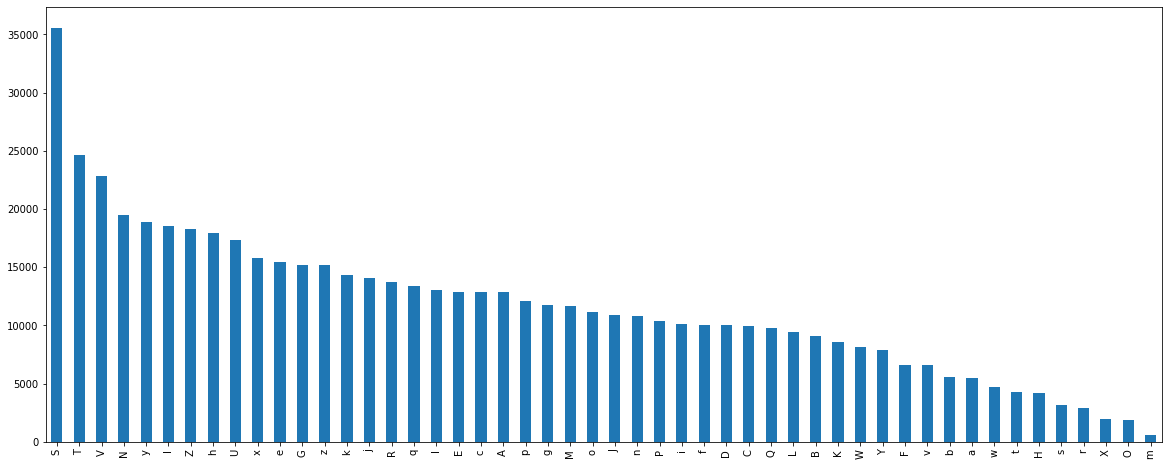

In [25]:
col = "second"
fig, ax1 = plt.subplots(figsize=(20, 8))
ord_5['second'].value_counts().plot.bar()

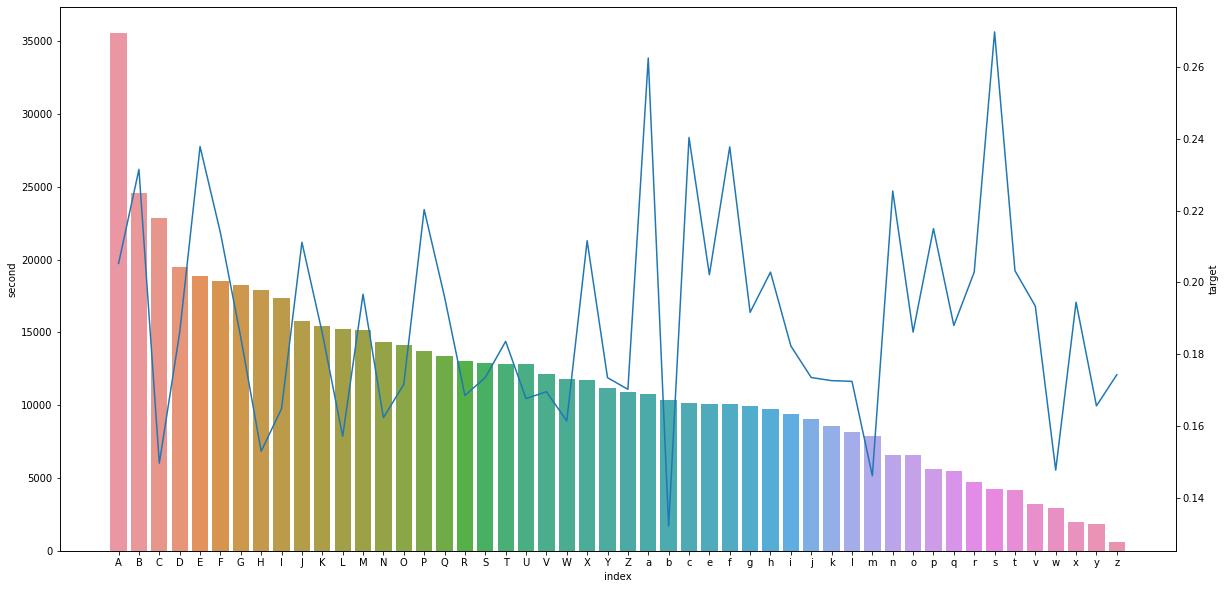

In [37]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
tmp = ord_5['second'].value_counts().to_frame().join(ord_5.groupby('second')['target'].mean()).reset_index()
sns.barplot(data=tmp, x='index', y='second', ax=ax1)
sns.lineplot(data=tmp, x='index', y='target', ax=ax2)